In [58]:
cd /mnt/lustre01/work/mh0731/m300382/snow

/mnt/lustre01/work/mh0731/m300382/snow


In [53]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import datetime
%matplotlib

In [59]:
import ims_reader
import map_projections_ims

In [ ]:
year=datetime.datetime.now().timetuple().tm_year
doy=datetime.datetime.now().timetuple().tm_yday

base_folder='/work/mh0731/m300382/snow/'
lon_to_plot=ims_reader.read_lons_4km(path=base_folder)
lat_to_plot=ims_reader.read_lats_4km(path=base_folder)
data_to_plot=ims_reader.read_data_4km(year=year, doy=doy)

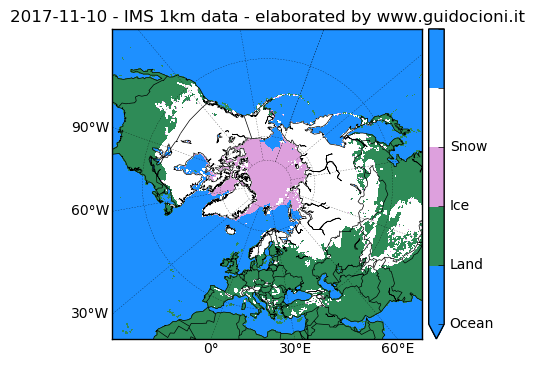

In [65]:
area="nh"

bmap=map_projections_ims.get_projection(area)
x,y=bmap(lon_to_plot, lat_to_plot)
bmap.contourf(x, y, data_to_plot, levels=np.array([0,1,2,3,4,5]),\
         colors=('dodgerblue', 'seagreen','plum','white'), extend='min')
cbar=bmap.colorbar(location='right')
cbar.set_ticklabels(['Ocean','Land','Ice','Snow'])
cbar.ax.set_xticklabels(['Water','Land','Ice','Snow'])
plt.title(datetime.datetime.strptime(str(year)+str(doy),"%Y%j").strftime("%Y-%m-%d")\
          +' - IMS 1km data - elaborated by www.guidocioni.it')

plt.show()